In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.Single_integral_method_vectorized import M

In [2]:
#Field parameters
Nc = 5 #Field revolutions in envelope
eps = 0 #(-1,0,1), Polarization of light
phi = 0 #Phase difference between envelope and field
#all values in au
wl = 0.057 #800nm wavelength
I = 0.003 #I=10^14 w/cm^2  
E0 = -0.500 #13.6 eV
res = 1000

M1 = M(Nc, eps, phi, wl, I, E0, res)

kxs = np.linspace(-2, 2, num=30)
kys = np.linspace(-2, 2, num=30)
kzs = np.linspace(-2, 2, num=30)
kxs_grid, kys_grid, kzs_grid = np.meshgrid(kxs, kys, kzs, indexing='ij')
ks = np.stack([kxs_grid, kys_grid, kzs_grid], axis=-1).reshape(-1, 3)
print(ks.shape)
Mk_squared_vals = M1.Mk0_squared(ks)
Mk_squared_vals = Mk_squared_vals.reshape(len(kxs), len(kys), len(kzs))
print(Mk_squared_vals.shape)


(27000, 3)
(27000,)
(30, 30, 30)


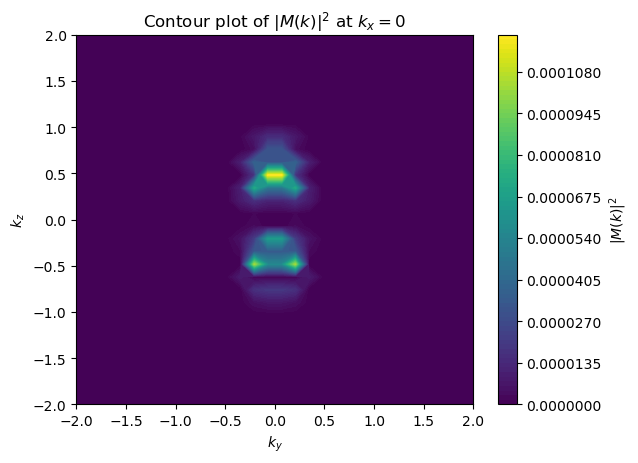

In [3]:
fig, ax = plt.subplots()
kx0_idx = np.argmin(np.abs(kxs))  # Closest to zero
Mk_slice = Mk_squared_vals[kx0_idx, :, :]  # shape (len(kys), len(kzs))
cf = ax.contourf(kys, kzs, Mk_slice.T, levels=100, cmap='viridis')
ax.set_xlabel(r'$k_y$')
ax.set_ylabel(r'$k_z$')
ax.set_title(r'Contour plot of $|M(k)|^2$ at $k_x=0$')
fig.colorbar(cf, ax=ax, label=r'$|M(k)|^2$')

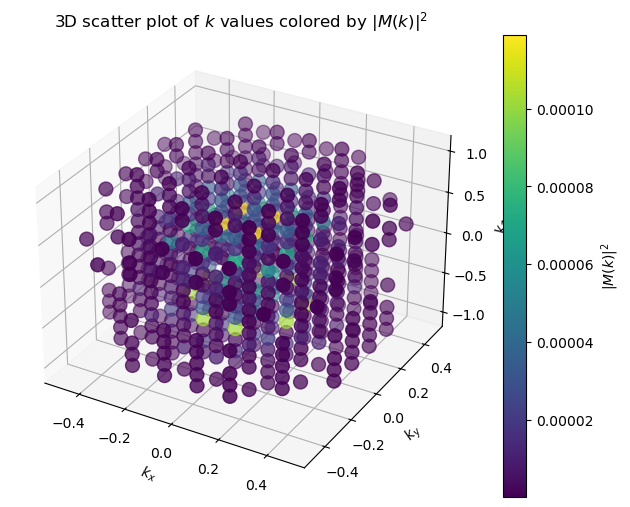

In [4]:
threshold = 0.0000001
mask = Mk_squared_vals.flatten() > threshold

fig_3d = plt.figure(figsize=(8, 6))
ax_3d = fig_3d.add_subplot(111, projection='3d')
sc = ax_3d.scatter(
    ks[mask, 0], ks[mask, 1], ks[mask, 2],
    c=Mk_squared_vals.flatten()[mask], cmap='viridis', s=100
)
ax_3d.set_xlabel(r'$k_x$')
ax_3d.set_ylabel(r'$k_y$')
ax_3d.set_zlabel(r'$k_z$')
ax_3d.set_title('3D scatter plot of $k$ values colored by $|M(k)|^2$')
fig_3d.colorbar(sc, ax=ax_3d, label=r'$|M(k)|^2$')